In [ ]:
# !pip install skimpy
import pandas as pd
# from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
# from skimpy import skim

In [ ]:
drive.mount('/content/drive')

In [543]:
import pandas as pd
# data=pd.read_csv('/content/drive/MyDrive/data.csv')
data = pd.read_csv('data.csv')
# data.head(1)

<h3>Drop ID and label</h3>

In [546]:
df = pd.DataFrame(data)
y = df["diagnosis"]
X = df.drop("id", axis='columns')
X = X.drop('Unnamed: 32', axis='columns')
X = X.drop("diagnosis", axis='columns')
# features_df.head(1)

<h3>check missing values</h3>

In [549]:
round(100*(X.isnull().sum()/len(X.index)), 2)

radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [551]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<h3>check for outliers</h3>

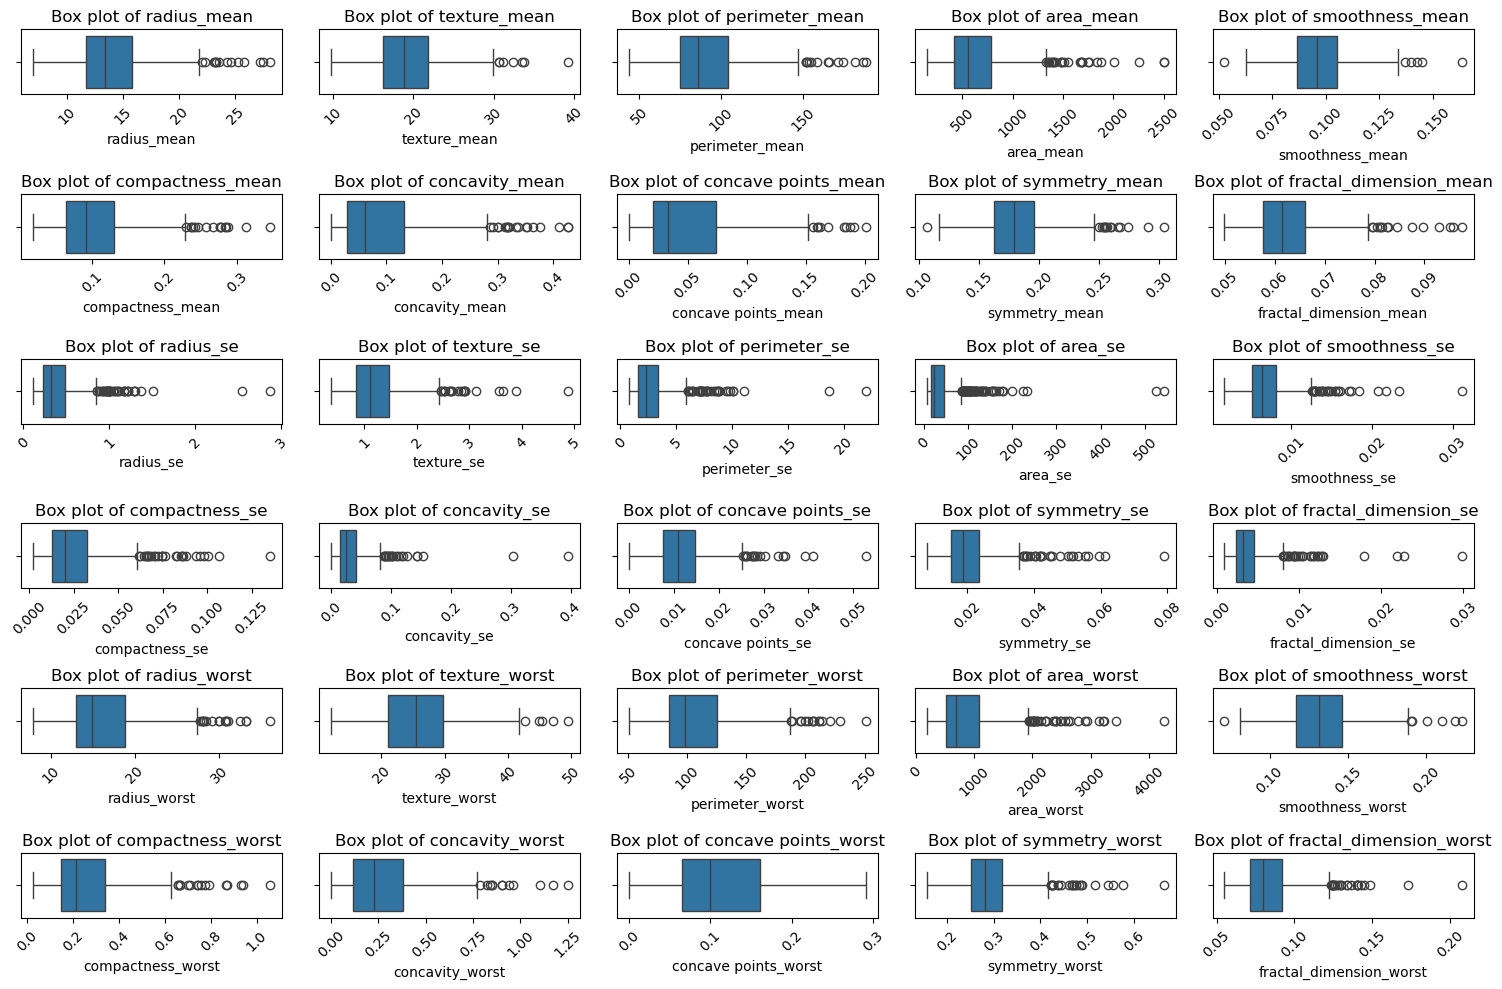

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [col for col in X.columns if col != 'Unnamed: 32']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(data=X, x=column)
    plt.title(f'Box plot of {column}')
    plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()


In [555]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None
        self.scaler = StandardScaler()

    def fit(self, X, normalize=True):

        X_scaled = self.scaler.fit_transform(X)
       
        covariance_matrix = np.cov(X_scaled, rowvar=False)

       
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

      
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

       
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues
        self.explained_variance_ratio = eigenvalues / total_variance

       
        if self.n_components is None or self.n_components > X.shape[1]:
            self.n_components = X.shape[1]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):

        X_scaled = self.scaler.transform(X)
    
        return np.dot(X_scaled, self.components)

    def inverse_transform(self, X_transformed):
     
        X_reconstructed = np.dot(X_transformed, self.components.T)
        if hasattr(self.scaler, 'mean_'):
            return X_reconstructed * self.scaler.scale_ + self.scaler.mean_
        else:
            return X_reconstructed + self.mean

    def plot_explained_variance(self):
      
        cumulative_variance = np.cumsum(self.explained_variance_ratio)
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Explained Variance by Principal Components')
        plt.grid()
        plt.show()


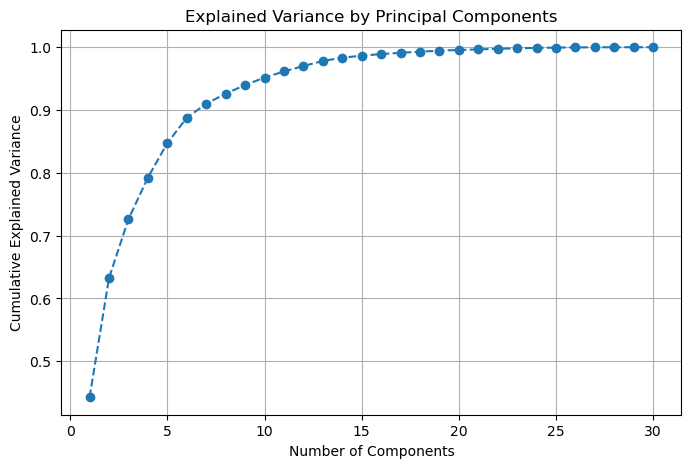

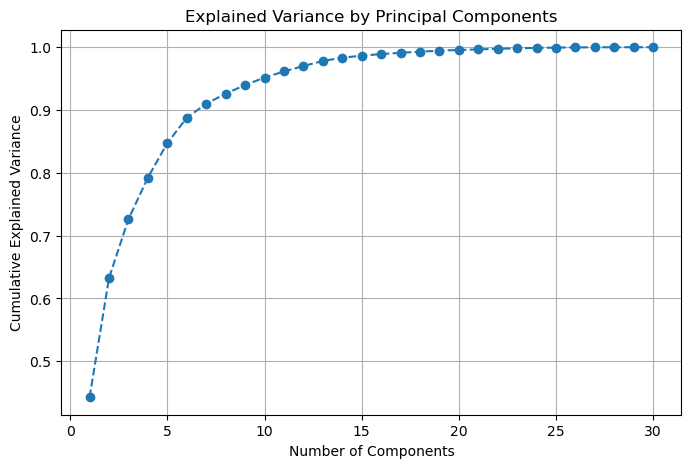

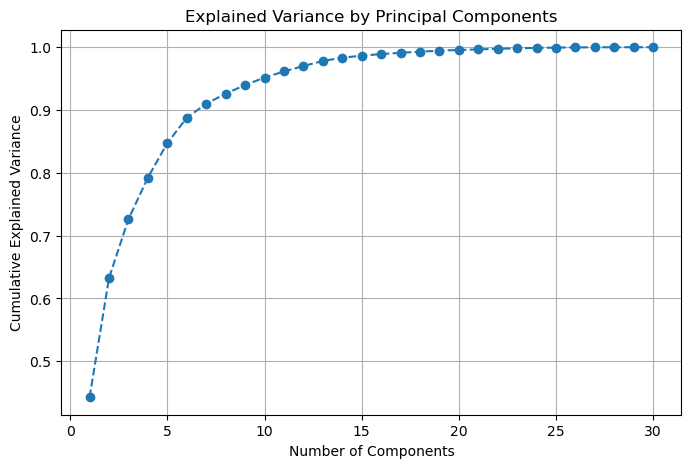

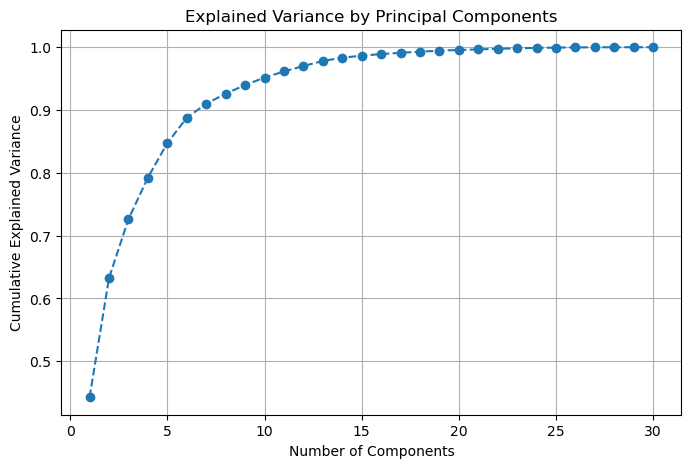

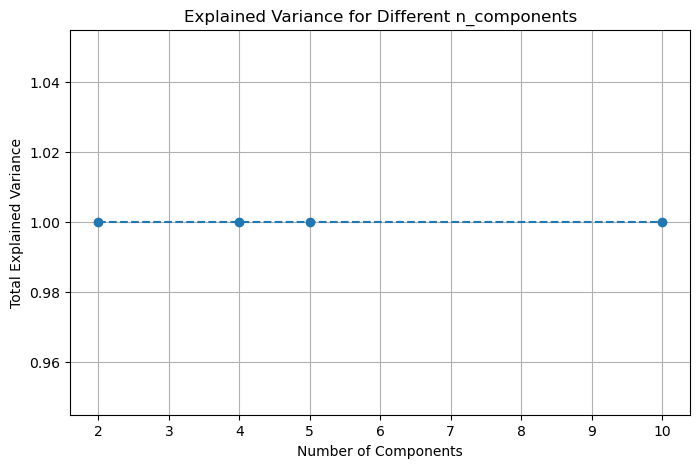

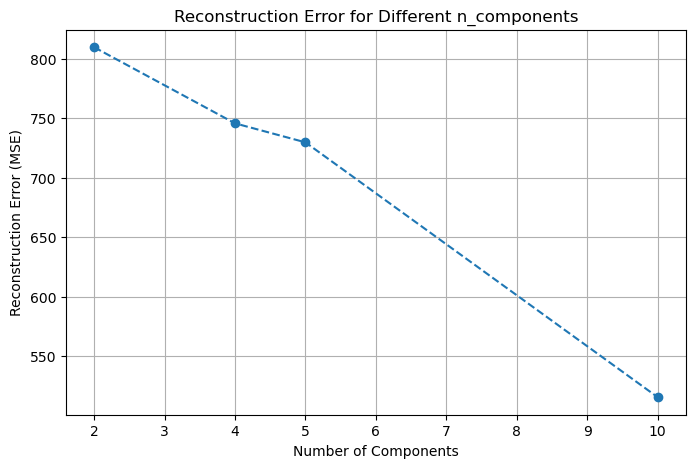

Optimal number of components: 10


In [567]:
explained_variance_ratios = []
reconstruction_errors = []

n_components_list = [2, 4, 5, 10]

for n in n_components_list:  
    pca = PCA(n_components=n)
    pca.fit(X)
    X_transformed = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio))

    # Calculate reconstruction error (Mean Squared Error between original and reconstructed data)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)

    
    pca.plot_explained_variance()

plt.figure(figsize=(8, 5))
plt.plot(n_components_list, explained_variance_ratios, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Explained Variance for Different n_components')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(n_components_list, reconstruction_errors, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error for Different n_components')
plt.grid(True)
plt.show()


optimal_n_components = n_components_list[np.argmin(reconstruction_errors)]
print(f"Optimal number of components: {optimal_n_components}")

    

<h3>Split data</h3>

In [459]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)